# SBI Insurance Claim Prediction
Problem Statement:
SBI Life insurance Project

This is "SBI Insurance Claim Prediction Dataset" which based on "[Medical Cost Personal Datasets][1]" to update sample value on top.

The features of the dataset includes:

1) age : age of policyholder 

2) sex: gender of policy holder (female=0, male=1) 

3) bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 25 

4) steps: average walking steps per day of policyholder 

5) children: number of children / dependents of policyholder 

6) smoker: smoking state of policyholder (non-smoke=0;smoker=1) 

7) region: the residential area of policyholder in the US (northeast=0, northwest=1, southeast=2, southwest=3) 

8) charges: individual medical costs billed by health insurance 

9) insuranceclaim: yes=1, no=0



# Importing Libraries

In [1]:
import pandas as pd
import numpy as  np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [2]:
df=pd.read_csv('sbi_insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


Top 5 heads of the dataset.

In [4]:
df.tail()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
1333,50,1,30.97,3,0,1,10600.5483,0
1334,18,0,31.92,0,0,0,2205.9808,1
1335,18,0,36.85,0,0,2,1629.8335,1
1336,21,0,25.80,0,0,3,2007.9450,0
1337,61,0,29.07,0,1,1,29141.3603,1


# EDA

In [6]:
# checking shape
df.shape

(1338, 8)

We have 1338 rows and 8 columns in the dataset. 

In [7]:
# checking data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   children        1338 non-null   int64  
 4   smoker          1338 non-null   int64  
 5   region          1338 non-null   int64  
 6   charges         1338 non-null   float64
 7   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


2 float data type and 6 integer data type columns are present in the dataset.

In [8]:
# checking null values
df.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

No null values present in the dataset.

# Visualization of nominal data

1    676
0    662
Name: sex, dtype: int64


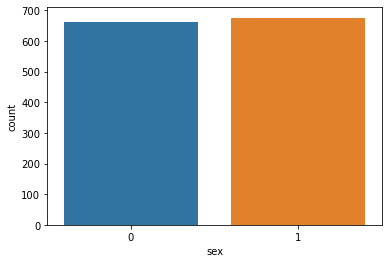

In [10]:
ax=sns.countplot(df['sex'])
print(df['sex'].value_counts())

0 is indiacting male and 1 is indicating female, and there is not much diffrence between male and female.

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


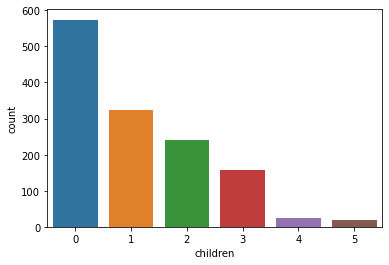

In [12]:
ax=sns.countplot(df['children'])
print(df['children'].value_counts())

Persons having no children is more , persons having 5 children are 18.

0    1064
1     274
Name: smoker, dtype: int64


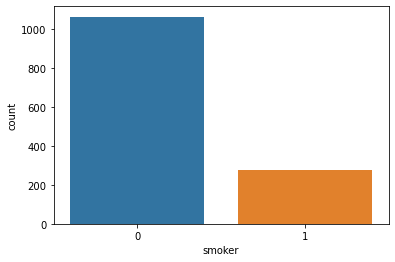

In [13]:
ax=sns.countplot(df['smoker'])
print(df['smoker'].value_counts())

Non-smokers are more than smokers. very little smokers are present in comparison with non-smoker.

2    364
1    325
3    325
0    324
Name: region, dtype: int64


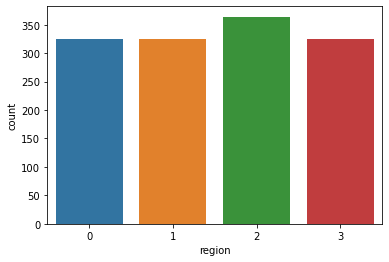

In [14]:
ax=sns.countplot(df['region'])
print(df['region'].value_counts())

0, 1, 2 and 3 is indicating some regions ,and there is not much difference between them.

1    783
0    555
Name: insuranceclaim, dtype: int64


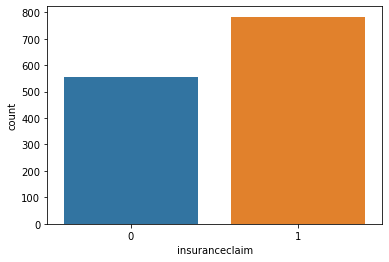

In [15]:
ax=sns.countplot(df['insuranceclaim'])
print(df['insuranceclaim'].value_counts())

persons with insuranceclaim is more than person not insuranceclaim.

# Visualization of integer data

<AxesSubplot:xlabel='age', ylabel='Density'>

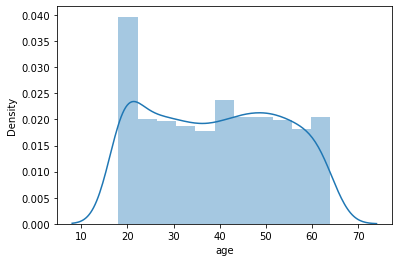

In [17]:
sns.distplot(df['age'],kde=True)

age column is looking normal and its range in between approx 20 to approx 65.

<AxesSubplot:xlabel='bmi', ylabel='Density'>

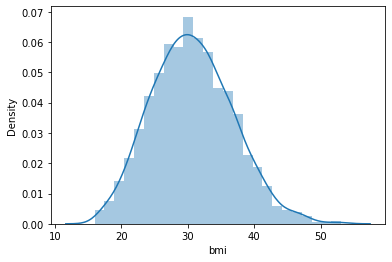

In [18]:
sns.distplot(df['bmi'],kde=True)

bmi is looking normal ranges in between 10 to 50.

<AxesSubplot:xlabel='charges', ylabel='Density'>

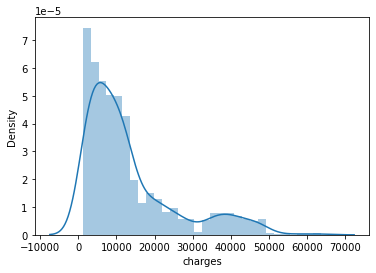

In [19]:
sns.distplot(df['charges'],kde=True)

Charges column is not looking normal it is bit left skewed.

# Checking outliers

age                   AxesSubplot(0.125,0.71587;0.227941x0.16413)
sex                AxesSubplot(0.398529,0.71587;0.227941x0.16413)
bmi                AxesSubplot(0.672059,0.71587;0.227941x0.16413)
children             AxesSubplot(0.125,0.518913;0.227941x0.16413)
smoker            AxesSubplot(0.398529,0.518913;0.227941x0.16413)
region            AxesSubplot(0.672059,0.518913;0.227941x0.16413)
charges              AxesSubplot(0.125,0.321957;0.227941x0.16413)
insuranceclaim    AxesSubplot(0.398529,0.321957;0.227941x0.16413)
dtype: object

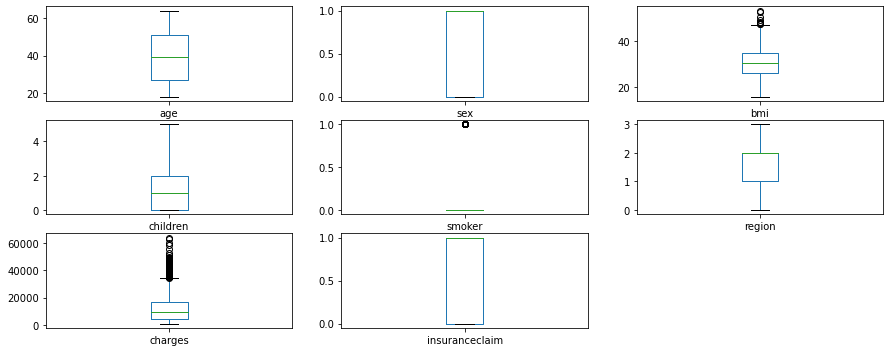

In [26]:
df.plot(kind='box',subplots=True, layout=(4,3), figsize=(15,8))

Outliers are presnent in bmi, charges and smoker column.

# checking skewness

In [27]:
df.skew()

age               0.055673
sex              -0.020951
bmi               0.284047
children          0.938380
smoker            1.464766
region           -0.038101
charges           1.515880
insuranceclaim   -0.346254
dtype: float64

Data is not much skewed , so we will not remove skewness.

# Statistical summary

In [29]:
df.describe()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


Number of values is same in all the columns.

There is some difference between mean and median in charges column.

There is also some differnce between 75% and max in charges column.

# Checking Correlations

<AxesSubplot:>

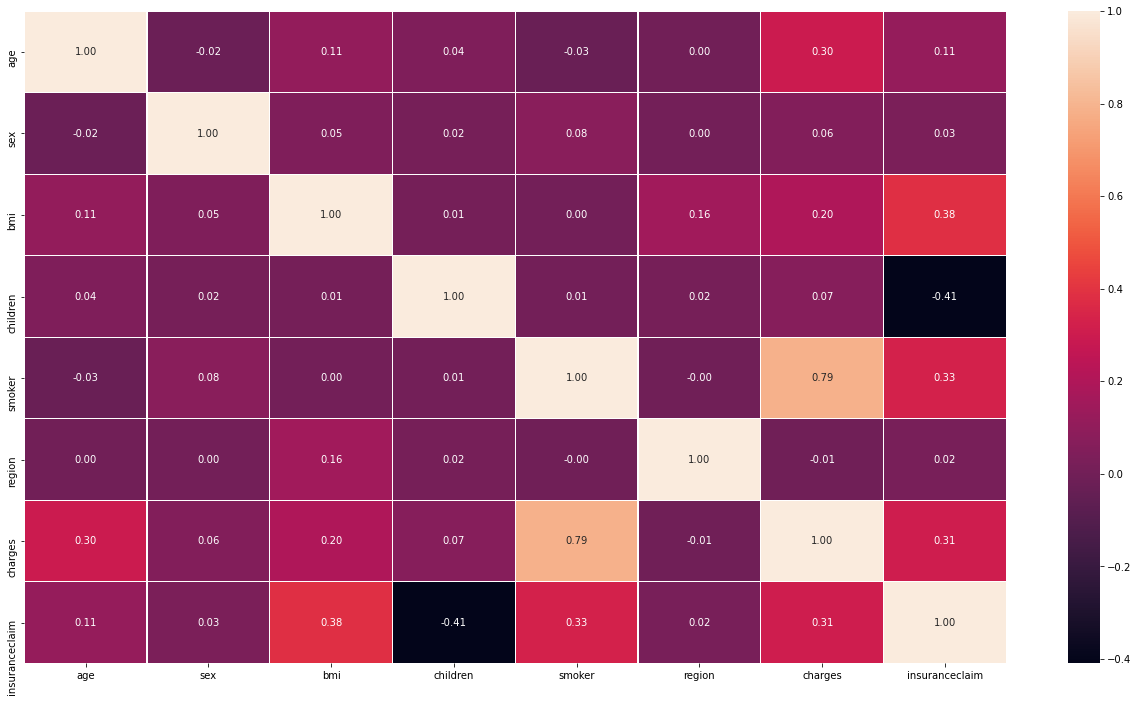

In [30]:
plt.figure(figsize=(22,12))
sns.heatmap(df.corr(),annot=True,linewidths =0.1,fmt='0.2f')

Target insuranceclaim is negatively correlated with children column.

there is some positive correlation between bmi and  insuranceclaim.

# Removing outliers

In [3]:
from scipy.stats import zscore

In [4]:
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([  32,   34,   71,  116,  166,  413,  425,  438,  543,  568,  577,
         640,  819,  847,  877,  932,  937,  969,  984, 1047, 1085, 1116,
        1130, 1146, 1230, 1245, 1272, 1300, 1317], dtype=int64),
 array([3, 6, 3, 2, 3, 3, 3, 3, 6, 3, 6, 3, 6, 2, 3, 3, 3, 3, 3, 2, 3, 3,
        3, 6, 6, 3, 3, 6, 2], dtype=int64))

In [5]:
df_new=df[(z<3).all(axis=1)]
df_new

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830,0
1334,18,0,31.920,0,0,0,2205.98080,1
1335,18,0,36.850,0,0,2,1629.83350,1
1336,21,0,25.800,0,0,3,2007.94500,0


In [6]:
df.shape

(1338, 8)

In [7]:
df_new.shape

(1309, 8)

In [8]:
df.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

29 rows has been removed as a outlier.

# Sperating the columns into x and y

In [9]:
x=df.drop('insuranceclaim',axis=1)
y=df['insuranceclaim']

In [10]:
x.shape

(1338, 7)

In [11]:
y.shape

(1338,)

# Train Test Split

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.20, random_state=43)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1070, 7)
(268, 7)
(1070,)
(268,)


# Importing Libraries

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Model Building

In [14]:
# Logistic regression
lr=LogisticRegression()
lr.fit(x_train,y_train)
pred_y=lr.predict(x_test)
print(accuracy_score(y_test,pred_y))
print(confusion_matrix(y_test,pred_y))
print(classification_report(y_test,pred_y))

0.7985074626865671
[[ 72  41]
 [ 13 142]]
              precision    recall  f1-score   support

           0       0.85      0.64      0.73       113
           1       0.78      0.92      0.84       155

    accuracy                           0.80       268
   macro avg       0.81      0.78      0.78       268
weighted avg       0.81      0.80      0.79       268



In [15]:
# cross validation logistic regression
score=cross_val_score(lr,x,y,cv=10)
print('cv score',np.mean(score))

cv score 0.8004432723600046


Accuracy score is 79.85% and cv score is 80.04%.

In [46]:
# Auc Roc curve of logistic Rgerssion
lr.fit(x_train,y_train)
y_pred_proba=lr.predict_proba(x_test)[:,1]

fpr,tpr,thresholds=roc_curve(y_test,y_pred_proba)

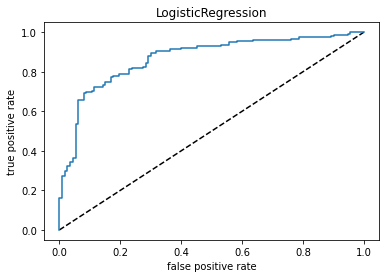

0.7766485869254924


In [47]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('LogisticRegression')
plt.show()

auc_score=roc_auc_score(y_test,lr.predict(x_test))
print(auc_score)

Auc_score is 77.66%.

In [48]:
# random Forest Classifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
pred_y=rf.predict(x_test)
print(accuracy_score(y_test,pred_y))
print(confusion_matrix(y_test,pred_y))
print(classification_report(y_test,pred_y))

0.9552238805970149
[[106   7]
 [  5 150]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       113
           1       0.96      0.97      0.96       155

    accuracy                           0.96       268
   macro avg       0.96      0.95      0.95       268
weighted avg       0.96      0.96      0.96       268



In [49]:
# cross validation Random Forest Classifier
score=cross_val_score(rf,x,y,cv=10)
print('cv score',np.mean(score))

cv score 0.9581247895859051


Accuracy score is 95.52% and cv score is 95.82%.

In [50]:
# AUC ROC Curve of Logistic Regression
rf.fit(x_train,y_train)
y_pred_proba=rf.predict_proba(x_test)[:,1]

fpr,tpr,thresholds=roc_curve(y_test,y_pred_proba)

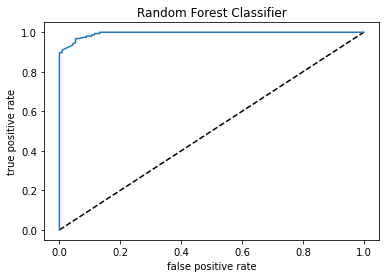

0.9428489865829289


In [52]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Random Forest Classifier')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('Random Forest Classifier')
plt.show()

auc_score=roc_auc_score(y_test,rf.predict(x_test))
print(auc_score)

Auc_score is 94.28%.

In [16]:
# Decision Tree Classifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred_y=dt.predict(x_test)
print(accuracy_score(y_test,pred_y))
print(confusion_matrix(y_test,pred_y))
print(classification_report(y_test,pred_y))

0.9850746268656716
[[110   3]
 [  1 154]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       113
           1       0.98      0.99      0.99       155

    accuracy                           0.99       268
   macro avg       0.99      0.98      0.98       268
weighted avg       0.99      0.99      0.99       268



In [17]:
# Cross validation GaussianNB
score=cross_val_score(dt,x,y,cv=10)
print('cv score',np.mean(score))

cv score 0.9760857367298843


Auucracy score is 98.50% and cv score is 97.60%.

In [19]:
# AUC ROC Curve of Decison Tree Classifier
dt.fit(x_train,y_train)
y_pred_proba=dt.predict_proba(x_test)[:,1]

fpr,tpr,thresholds=roc_curve(y_test,y_pred_proba)

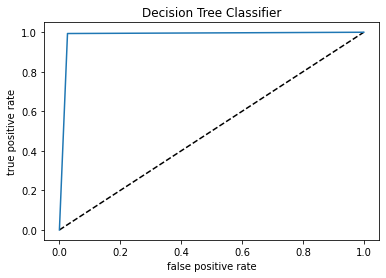

0.9834998572652013


In [21]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Decision Tree Classifier')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('Decision Tree Classifier')
plt.show()

auc_score=roc_auc_score(y_test,dt.predict(x_test))
print(auc_score)

Auc score is 98.34%.

In [18]:
# GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)
pred_y=gnb.predict(x_test)

print(accuracy_score(y_test,pred_y))
print(confusion_matrix(y_test,pred_y))
print(classification_report(y_test,pred_y))

0.7313432835820896
[[ 92  21]
 [ 51 104]]
              precision    recall  f1-score   support

           0       0.64      0.81      0.72       113
           1       0.83      0.67      0.74       155

    accuracy                           0.73       268
   macro avg       0.74      0.74      0.73       268
weighted avg       0.75      0.73      0.73       268



In [19]:
# Cross validation GaussianNB
score=cross_val_score(gnb,x,y,cv=10)
print('cv score',np.mean(score))

cv score 0.7735327123779598


Accuarcy score is 73.13% and cv score is 77.35%.

In [20]:
# AUC ROC curve for GaussianNB
gnb.fit(x_train,y_train)
y_pred_proba=gnb.predict_proba(x_test)[:,1]

fpr,tpr,thresholds=roc_curve(y_test,y_pred_proba)

0.742563516985441

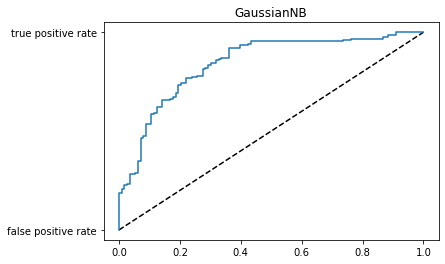

In [22]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='GaussianNB')
plt.plot('false positive rate')
plt.plot('true positive rate')
plt.title('GaussianNB')

auc_score=roc_auc_score(y_test,gnb.predict(x_test))
auc_score


Auc score is 74.25%.

In [ ]:
gd_sr.fit(x,y)

best_parameters =gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best_score_
print(best_result)


# HYPER PARAMETER TUNING

In [38]:
from sklearn import datasets
from sklearn.model_selection import GridSearchCV

dtc=DecisionTreeClassifier(min_samples_split=2, random_state=0)

grid_param={'criterion':['gini','entropy']}


gd_sr=GridSearchCV(estimator=dtc,
                  param_grid=grid_param,
                  scoring='accuracy',
                  cv=5)


gd_sr.fit(x,y)

best_parameters=gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best_score_
print(best_result)

{'criterion': 'entropy'}
0.9828106657722623


# Final Model

In [40]:
final_mode=DecisionTreeClassifier(criterion='entropy')
final_mode.fit(x_train,y_train)
pred=final_mode.predict(x_test)
acc=accuracy_score(y_test,pred)

print('accuracy score',acc*100)

dtscore=cross_val_score(dtc,x,y,cv=5)
dtcscore=dtscore.mean()
print('cross val score:',dtcscore*100)

accuracy score 100.0
cross val score: 97.90793224886801


After Hyper Parameter Tuning the accuracy score is 100% and cross validation score is 97.90%. So we can say our model performance is extremly well.

# Saving the model

In [41]:
import pickle
filename='sbi_insurance.pkl'
pickle.dump(dtc,open(filename,'wb'))

# Conclusion

In [42]:
loaded_model=pickle.load(open('sbi_insurance.pkl','rb'))
loaded_model.fit(x_train,y_train)
result=loaded_model.score(x_test,y_test)
result

0.9850746268656716

In [43]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred[:]],index=['predicted','original'])
conclusion
                

,0,1,2,3,4,5,6,7,8,9,...,258,259,260,261,262,263,264,265,266,267
predicted,0,0,1,1,1,0,1,0,1,1,...,0,0,1,0,1,1,1,0,1,1
original,0,0,1,1,1,0,1,0,1,1,...,0,0,1,0,1,1,1,0,1,1


With the help of Project , I learnt how to done EDA.

I also learnt ,making use of packages like matplotlib and seaborn to develop better insights of the data.

I have also learnt how to remove outliers and skewness to predict better accuracy.

I have also seen the impacts on the columns on Average Price.

I came to know through the analysis ,which model will predict better accuracy.

This project helped me to gain deep knowledge , and also get to know where to use models.